# 결측값 처리(누락된 데이터 다루기)
- pandas에서는 R에서 결측치를 NA(Not Available)로 취급하는 개념을 차용
- 파이썬의 내장 None 값은 NA값으로 취급된다.
- 일반적으로 누락된 값은 데이터 테이블에 빈 공간이나 예약된 문자열로 채워진다.
- **숫자가 아니라는 의미 NaN(Not a Number)나 관계형 데이터베이스에서 모르는 값을 지칭하는데 주로 사용되는 NULL과 같은 값을 사용한다.**

## 1. 결측값 식별
- isnull() 
- notnull()

## 2. 결측값 제거 / 중복체크 / 치환하기
- 결측값 제거 : dropna() / axis=0, 1 / how='all' / thresh / subset 등
- 중복 체크 : drop_duplicate() 
- 치환하기 : data.replace(a, b) / a,b는 (-99, np.nan) (np.nan, 0), {'one':1,'two':2} 딕셔너리도 가능

## 3. 결측값 채우기
### (1) Pandas 방식 : fillna()
- 가. 결측값을 특정 값으로 채우기 
- 나. 결측값을 앞 방향 혹은 뒷 방향으로 채우기
- 다. 결측값 채우는 횟수 제한
- 라. 결측값을 변수별 평균으로 채우기

### (2) Pandas 방식 : interpolate() / 시계열에서의 결측값 채우기
- 가. 선형으로 비례하여 결측값 보간
- 나. 시계열 날짜 index를 기준으로 결측값 보간
- 다. 결측값 보간 갯수 제한하기

### (3) Scikit learn 방식
- 가. SimpleImputer 보간 (가장 일반적)
- 나. KNNImputer 보간

### (4) Scipy 방식
- Scipy.interpolate(x, y, kind) 이용

In [1]:
import numpy as np
import pandas as pd

# 여러개 쳐도 나오게
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# (0) Missing Value Data Frame

data = np.array([[1.0, 2.0, np.NaN, 3.0],
                 [np.NaN, 4.0, np.NaN, 7.0],
                 [16.2, 7.2, 3.8, 3.0],
                 [np.NaN, np.NaN, np.NaN, 1.0]] )
mv_df = pd.DataFrame(data, columns=['n1','n2','n3','n4'], index=['r1','r2','r3','r4'])
mv_df

,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,NaN,4.0,NaN,7.0
r3,16.2,7.2,3.8,3.0
r4,NaN,NaN,NaN,1.0


In [2]:
# 1. 결측값 식별 - isnull()
mv_df.isnull().sum(axis=0) # 열별 확인
mv_df.isnull().sum(axis=1) # 행별 확인

n1    2
n2    1
n3    3
n4    0
dtype: int64

r1    1
r2    2
r3    0
r4    3
dtype: int64

In [6]:
# 2. 결측값 제거 (inplace=True) 옵션시 원래 객체 반환

# 원본
mv_df
print('원본')

# 행 제거
mv_df.dropna(axis=0) 
print('행 제거')

# 열들 제거
mv_df.dropna(axis=1) 
print('열 제거')

# 모든 열이 NaN인 것만 삭제
mv_df.dropna(how="all") 
print('모든 열이 NaN 제거')

# 임계값 2.2보다 작으면 삭제
mv_df.dropna(thresh=2.2) 
print('임계값 2.2보다 작으면 삭제')

# 특정열에 NaN이 있는 행만 삭제
mv_df.dropna(subset=['n2'])
print('특정열에 NaN이 있는 행 삭제')


,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,NaN,4.0,NaN,7.0
r3,16.2,7.2,3.8,3.0
r4,NaN,NaN,NaN,1.0


원본


,n1,n2,n3,n4
r3,16.2,7.2,3.8,3.0


행 제거


,n4
r1,3.0
r2,7.0
r3,3.0
r4,1.0


열 제거


,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,NaN,4.0,NaN,7.0
r3,16.2,7.2,3.8,3.0
r4,NaN,NaN,NaN,1.0


모든 열이 NaN 제거


,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r3,16.2,7.2,3.8,3.0


임계값 2.2보다 작으면 삭제


,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,NaN,4.0,NaN,7.0
r3,16.2,7.2,3.8,3.0


특정열에 NaN이 있는 행 삭제


In [9]:
# 2. 결측값 제거 (inplace=True) 옵션시 원래 객체 반환
mv_df2 = pd.DataFrame({'k1':['one','two']*3 + ['two'],
                      'k2':[1,1,2,3,3,4,4],
                      'v1':[0,1,2,3,4,5,5]})
mv_df2
print('원본')


# 각 로우가 중복인지 아닌지 체크 (행 전체가 똑같이 중복되는게 있는지)
mv_df2.duplicated() 
print('각 행중에 중복인것이 있는지 체크')

# drop_duplicates 는 기본적으로 처음 발견된 값을 유지한다
mv_df2.drop_duplicates()
print('각 행중에 중복인것이 있는지 체크 후 삭제까지(처음발견값유지)')

# drop_duplicates 나중에 발견된 값 유지하기
mv_df2.drop_duplicates(['k2'], keep='last') 
print('각 행중에 특정열(k2)에 중복인것이 있는지 체크 후 삭제까지(나중발견값유지)')



,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,5


원본


0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

각 행중에 중복인것이 있는지 체크


,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5


각 행중에 중복인것이 있는지 체크 후 삭제까지(처음발견값유지)


,k1,k2,v1
1,two,1,1
2,one,2,2
4,one,3,4
6,two,4,5


각 행중에 특정열(k2)에 중복인것이 있는지 체크 후 삭제까지(나중발견값유지)


In [10]:
# 2. 데이터 치환하기 

# one, two 를 -> three로
mv_df2
print('원본')

mv_df3 = mv_df2.replace(['one','two'], 'three')
mv_df3
print('one, two를 three로 바꾸기')

# dictionary 형태로도 가능
mv_df3 = mv_df3.replace({'three':'one'})
mv_df3
print('three를 one으로 바꾸기')


,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,5


원본


,k1,k2,v1
0,three,1,0
1,three,1,1
2,three,2,2
3,three,3,3
4,three,3,4
5,three,4,5
6,three,4,5


one, two를 three로 바꾸기


,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,one,3,3
4,one,3,4
5,one,4,5
6,one,4,5


three를 one으로 바꾸기


In [15]:
# (3-0) 원본 데이터
mv_df
print('원본')

# (3-1-가) fillna() 를 이용한 결측값 채우기
df3_1 = mv_df.fillna(0)
df3_1
print('fillna()를 이용한 결측값 채우기')

# (3-1-나) 결측값을 앞 방향 으로 채우기
df3_2 = mv_df.fillna(method='ffill') # pad도 가능
df3_2
print('결측값을 앞 값으로 채우기')

# (3-1-나) 결측값을 뒷 방향으로 채우기
df3_3 = mv_df.fillna(method='bfill') # backfill도 가능
df3_3
print('결측값을 뒷 값으로 채우기')

mv_df
print('원본')

# (3-1-다) 앞/뒤 방향으로 결측값 채우는 횟수 제한
df3_4 = mv_df.fillna(method='bfill', limit=1) 
df3_4
print('결측값을 앞/뒤 방향으로 결측값 채우기(횟수제한)')

# (3-1-라) 변수별 평균으로 대체하기
df3_5 = mv_df.fillna(mv_df.mean())
df3_5
mv_df.mean()
print('변수별 평균으로 채우기')

# (3-1-마) 다른 변수의 값으로 대체하기
# n2 칼럼에 결측값이 없으면 n2 사용, 결측값 있으면 n3 사용
mv_df2 = mv_df.copy()
mv_df2['n2_New'] = np.where(pd.notnull(mv_df2['n2']) == True, mv_df2['n2'], mv_df2['n1'])
mv_df2
print('n2, n3 칼럼에 결측값이 없으면 n2, 있으면 n3 사용')

,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,NaN,4.0,NaN,7.0
r3,16.2,7.2,3.8,3.0
r4,NaN,NaN,NaN,1.0


원본


,n1,n2,n3,n4
r1,1.0,2.0,0.0,3.0
r2,0.0,4.0,0.0,7.0
r3,16.2,7.2,3.8,3.0
r4,0.0,0.0,0.0,1.0


fillna()를 이용한 결측값 채우기


,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,1.0,4.0,NaN,7.0
r3,16.2,7.2,3.8,3.0
r4,16.2,7.2,3.8,1.0


결측값을 앞 값으로 채우기


,n1,n2,n3,n4
r1,1.0,2.0,3.8,3.0
r2,16.2,4.0,3.8,7.0
r3,16.2,7.2,3.8,3.0
r4,NaN,NaN,NaN,1.0


결측값을 뒷 값으로 채우기


,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,NaN,4.0,NaN,7.0
r3,16.2,7.2,3.8,3.0
r4,NaN,NaN,NaN,1.0


원본


,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,16.2,4.0,3.8,7.0
r3,16.2,7.2,3.8,3.0
r4,NaN,NaN,NaN,1.0


결측값을 앞/뒤 방향으로 결측값 채우기(횟수제한)


,n1,n2,n3,n4
r1,1.0,2.0,3.8,3.0
r2,8.6,4.0,3.8,7.0
r3,16.2,7.2,3.8,3.0
r4,8.6,4.4,3.8,1.0


n1    8.6
n2    4.4
n3    3.8
n4    3.5
dtype: float64

변수별 평균으로 채우기


,n1,n2,n3,n4,n2_New
r1,1.0,2.0,NaN,3.0,2.0
r2,NaN,4.0,NaN,7.0,4.0
r3,16.2,7.2,3.8,3.0,7.2
r4,NaN,NaN,NaN,1.0,NaN


n2, n3 칼럼에 결측값이 없으면 n2, 있으면 n3 사용


In [17]:
# (3-2) pandas 방식 : interpolate() / 시계열에서의 결측값 채우기

from datetime import datetime

datestrs = ['12/1/2020', '12/03/2020', '12/05/2020', '12/8/2020', '12/11/2020']
dates = pd.to_datetime(datestrs)
ts = pd.DataFrame({'C1': [1, 2, np.nan, np.nan, 5],
                'C2': [6, 8, 10, np.nan, 20]},
              index=dates)

ts

,C1,C2
2020-12-01,1.0,6.0
2020-12-03,2.0,8.0
2020-12-05,NaN,10.0
2020-12-08,NaN,NaN
2020-12-11,5.0,20.0


In [19]:
# (3-2-가) 선형으로 비례하여 결측값 보간
ts_linear = ts.interpolate()
ts_linear
print('선형보간법')

# (3-2-나) 시계열 날짜 index를 기준으로 결측값 보간
ts_time = ts.interpolate(method='time')
ts_time
print('시계열 날짜 index기준')

,C1,C2
2020-12-01,1.0,6.0
2020-12-03,2.0,8.0
2020-12-05,3.0,10.0
2020-12-08,4.0,15.0
2020-12-11,5.0,20.0


선형보간법


,C1,C2
2020-12-01,1.000,6.0
2020-12-03,2.000,8.0
2020-12-05,2.750,10.0
2020-12-08,3.875,15.0
2020-12-11,5.000,20.0


시계열 날짜 index기준


<hr>

# Scikit learn
## 사이킷 런 보간법
![Impute](img/Impute.PNG)

### sklearn.impute.SimpleImputer (missing_values, strategy, fill_value, verbose, copy ..)
- missing_values : 채워줄 값 / default=np.nan
- strategy : mean / median / most_frequent / constant (constant 일 경우 fill_value매개변수도 채워줘야함)
- fill_value : strategy = constant 일 때만 사용. 한번에 모든 경우를 0 or "missing_value"로 바꿈

#### method
- fit / fit_transform / get_param / set_param / transform (결측치 변환)

### sklearn.impute.KNNImputer(missing_values, n_neighbors, weights, metric, copy.., )
- missing_values : 채워줄 값 / default = np.nan
- n_neighbors : 이웃의 수 / default = 5
- weights : uniform(이웃의 모든 포인트에게 균일한 가중치), distance(이웃에게 거리를 통해 다르게 가중치)

#### method
- fit / fit_transform / get_param / set_param / transform (결측치 변환)

In [21]:
# (3-3-가) SimpleImputer 보간기

from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values = np.nan, strategy='mean')
imr.fit(mv_df.values)

# 보간법 전
print('SimpleImputer 평균(mean)으로 보간')
mv_df

imputed_data = imr.transform(mv_df.values)
imputed_data

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

SimpleImputer 평균(mean)으로 보간


,n1,n2,n3,n4
r1,1.0,2.0,NaN,3.0
r2,NaN,4.0,NaN,7.0
r3,16.2,7.2,3.8,3.0
r4,NaN,NaN,NaN,1.0


array([[ 1. ,  2. ,  3.8,  3. ],
       [ 8.6,  4. ,  3.8,  7. ],
       [16.2,  7.2,  3.8,  3. ],
       [ 8.6,  4.4,  3.8,  1. ]])

In [34]:
# (3-3-나) KNN 보간기
from sklearn.impute import KNNImputer
X = np.array([[1, 2, np.nan], [3, 4, 3], [np.nan, np.nan, 5], [7, 8, 7],[3, 7, 13]])

# 보간법 전
X

# KNN 보간기

print('KNN으로 보간')
imputer = KNNImputer(n_neighbors=2)
knn_imputed_data = imputer.fit_transform(X)
knn_imputed_data

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan, nan,  5.],
       [ 7.,  8.,  7.],
       [ 3.,  7., 13.]])

KNN으로 보간


array([[ 1.,  2.,  8.],
       [ 3.,  4.,  3.],
       [ 5.,  6.,  5.],
       [ 7.,  8.,  7.],
       [ 3.,  7., 13.]])

# Scipy
## Scipy.interpolate 보간법
- 통계적 혹은 실험적으로 구해진 **데이터들로부터, 주어진 데이터를 만족하는 근사함수 f(x) 를 구하고,** 이 식을 이용하여 주어진 변수에 대한 함수 값을 구하는 일련의 과정을 의미함.

#### interp1d(array x, array y, kind)
- x, y : 실수값 배열, 방향의 길이는 서로 동일필요
- kind : 보간종류 
    - linear, nearest : 선형보간법, nearest 보간법 **(아래꺼와는 직선, 곡선 차이)**
    - zero, slinear, quardratic, cubic (0, 1, 2, 3 차 스플라인 보간법)
    - previous, next (단순 포인트의 이전 or 다음)

<hr>

#### - interpolation 아래에 splrep, splev 등의 보간법도 있으나 다 1차원적 (선으로 이루어진 ㅇㅇ 것들) 이고 kind에 다 포함되어있음
#### - 2차원 보간법들은 면인듯? 

(-2, 2)

Text(0.5, 1.0, 'Interoperate')

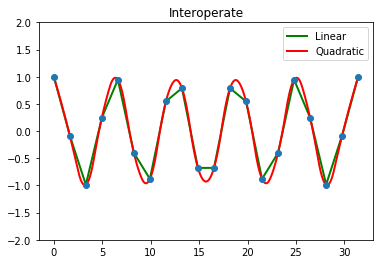

In [36]:
# Scipy 보간법
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

# Cosine 함수를 0부터 10pi까지 20개 만든다.
x = np.linspace(0,10*np.pi, 20)
y = np.cos(x)

#interoperate 함수로 보간법을 적용하여 linear(선형보정) quadratic(부드러운 보정) 두가지 방법으로 만든다
fl = interp1d(x,y,kind = 'linear') # 선형
fq = interp1d(x,y,kind = 'quadratic') # spline

xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)

# Plot the data and the interpolation
plt.plot(xint, yintl, color = 'green', linewidth=2)
plt.plot(xint, yintq, color = 'red', linewidth=2)
plt.legend(['Linear','Quadratic'])
plt.plot(x,y,'o')    #값의 위치를 점으로 표현
plt.ylim(-2,2)

plt.title('Interoperate')
plt.show()

## 출처
-  https://rfriend.tistory.com/262?category=675917 [R, Python 분석과 프로그래밍의 친구 (by R Friend)] // pandas 결측치처리
- https://rfriend.tistory.com/264?category=675917 // 시계열 형식의 결측치 처리
- https://sdc-james.gitbook.io/onebook/4.-numpy-and-scipy/4.3-scipy/4.3.1.-interpolation // scipy 보간법
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html // scikit-learn api